Step1 : Load the dataset & explore, install necessary library and install

In [1]:
!pip install pandas
import pandas as pd

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install numpy

Defaulting to user installation because normal site-packages is not writeable


In [3]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [4]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [5]:
!pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
bankDataframe = pd.read_excel("bank.xlsx")

In [8]:
#Display first few rows
print(bankDataframe.head())

      Account No       DATE               TRANSACTION DETAILS  CHQ.NO.  \
0  409000611074' 2017-06-29  TRF FROM  Indiaforensic SERVICES      NaN   
1  409000611074' 2017-07-05  TRF FROM  Indiaforensic SERVICES      NaN   
2  409000611074' 2017-07-18        FDRL/INTERNAL FUND TRANSFE      NaN   
3  409000611074' 2017-08-01   TRF FRM  Indiaforensic SERVICES      NaN   
4  409000611074' 2017-08-16        FDRL/INTERNAL FUND TRANSFE      NaN   

  VALUE DATE  WITHDRAWAL AMT  DEPOSIT AMT  BALANCE AMT  .  
0 2017-06-29             NaN    1000000.0    1000000.0  .  
1 2017-07-05             NaN    1000000.0    2000000.0  .  
2 2017-07-18             NaN     500000.0    2500000.0  .  
3 2017-08-01             NaN    3000000.0    5500000.0  .  
4 2017-08-16             NaN     500000.0    6000000.0  .  


In [9]:
#check dataset info
print(bankDataframe.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116201 entries, 0 to 116200
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Account No           116201 non-null  object        
 1   DATE                 116201 non-null  datetime64[ns]
 2   TRANSACTION DETAILS  113702 non-null  object        
 3   CHQ.NO.              905 non-null     float64       
 4   VALUE DATE           116201 non-null  datetime64[ns]
 5   WITHDRAWAL AMT       53549 non-null   float64       
 6   DEPOSIT AMT          62652 non-null   float64       
 7   BALANCE AMT          116201 non-null  float64       
 8   .                    116201 non-null  object        
dtypes: datetime64[ns](2), float64(4), object(3)
memory usage: 8.0+ MB
None


In [10]:
#check for missing values
print(bankDataframe.isnull().sum())

Account No                  0
DATE                        0
TRANSACTION DETAILS      2499
CHQ.NO.                115296
VALUE DATE                  0
WITHDRAWAL AMT          62652
DEPOSIT AMT             53549
BALANCE AMT                 0
.                           0
dtype: int64


Step2: Data cleaning  preprocessing

In [11]:
bankDataframe.fillna(0,inplace=True)

In [12]:
bankDataframe["DATE"] = pd.to_datetime(bankDataframe["DATE"])
print(bankDataframe.dtypes)

Account No                     object
DATE                   datetime64[ns]
TRANSACTION DETAILS            object
CHQ.NO.                       float64
VALUE DATE             datetime64[ns]
WITHDRAWAL AMT                float64
DEPOSIT AMT                   float64
BALANCE AMT                   float64
.                              object
dtype: object


In [13]:
print(bankDataframe.head())

      Account No       DATE               TRANSACTION DETAILS  CHQ.NO.  \
0  409000611074' 2017-06-29  TRF FROM  Indiaforensic SERVICES      0.0   
1  409000611074' 2017-07-05  TRF FROM  Indiaforensic SERVICES      0.0   
2  409000611074' 2017-07-18        FDRL/INTERNAL FUND TRANSFE      0.0   
3  409000611074' 2017-08-01   TRF FRM  Indiaforensic SERVICES      0.0   
4  409000611074' 2017-08-16        FDRL/INTERNAL FUND TRANSFE      0.0   

  VALUE DATE  WITHDRAWAL AMT  DEPOSIT AMT  BALANCE AMT  .  
0 2017-06-29             0.0    1000000.0    1000000.0  .  
1 2017-07-05             0.0    1000000.0    2000000.0  .  
2 2017-07-18             0.0     500000.0    2500000.0  .  
3 2017-08-01             0.0    3000000.0    5500000.0  .  
4 2017-08-16             0.0     500000.0    6000000.0  .  


In [14]:
bankDataframe["DEPOSIT AMT"] = bankDataframe["DEPOSIT AMT"].abs()

In [15]:
bankDataframe["BALANCE AMT"] = bankDataframe["BALANCE AMT"].abs()

In [16]:
bankDataframe["WITHDRAWAL AMT"] = bankDataframe["WITHDRAWAL AMT"].abs()

In [17]:
print(bankDataframe.head())

      Account No       DATE               TRANSACTION DETAILS  CHQ.NO.  \
0  409000611074' 2017-06-29  TRF FROM  Indiaforensic SERVICES      0.0   
1  409000611074' 2017-07-05  TRF FROM  Indiaforensic SERVICES      0.0   
2  409000611074' 2017-07-18        FDRL/INTERNAL FUND TRANSFE      0.0   
3  409000611074' 2017-08-01   TRF FRM  Indiaforensic SERVICES      0.0   
4  409000611074' 2017-08-16        FDRL/INTERNAL FUND TRANSFE      0.0   

  VALUE DATE  WITHDRAWAL AMT  DEPOSIT AMT  BALANCE AMT  .  
0 2017-06-29             0.0    1000000.0    1000000.0  .  
1 2017-07-05             0.0    1000000.0    2000000.0  .  
2 2017-07-18             0.0     500000.0    2500000.0  .  
3 2017-08-01             0.0    3000000.0    5500000.0  .  
4 2017-08-16             0.0     500000.0    6000000.0  .  


Step3 : Basic Analysis of Transactions

In [18]:
#check distribution of transactions

Why? Helps identify outliers(extremely high-value transactions could be fraud).

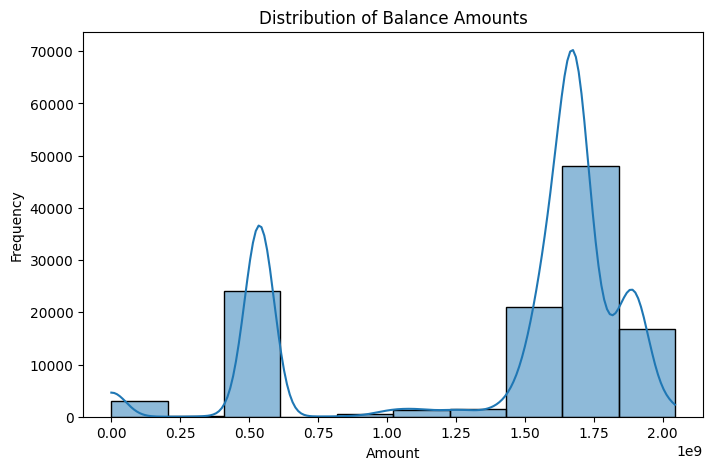

In [19]:
plt.figure(figsize=(8,5))
sns.histplot(bankDataframe["BALANCE AMT"], bins = 10, kde=True)
plt.title("Distribution of Balance Amounts")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

In [20]:
print(bankDataframe.memory_usage(deep=True).sum() / (1024 * 1024), "MB")  # Convert bytes to MB

25.50797939300537 MB


Why? Helps understand which transaction type is most common in fraud cases

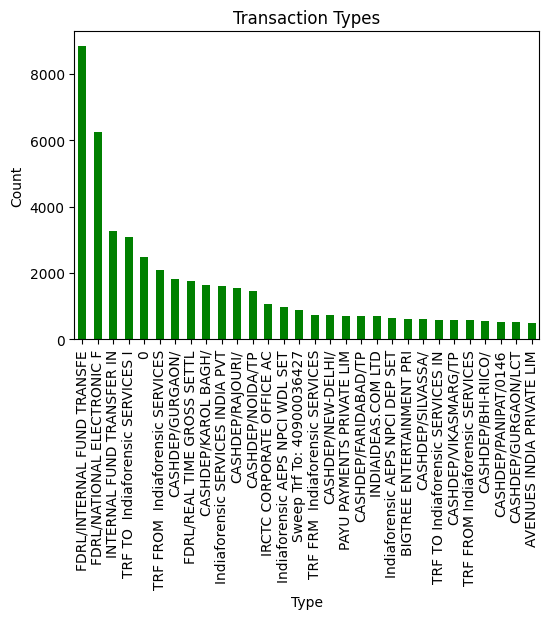

In [21]:
#top transaction types
# print(bankDataframe["TRANSACTION DETAILS"].value_counts())
#plot transaction types
bankDataframe["TRANSACTION DETAILS"].value_counts().head(30).plot(kind="bar",color="green", figsize=(6,4))
plt.title("Transaction Types")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

Step4: Fraud Detection (Anomaly Detection)

In [22]:
#Identifing unusually large transactions (outliers)
#find transactions above a threshold
threshold = bankDataframe["WITHDRAWAL AMT"].quantile(0.99)
fraud_high_amount_withdrawn = bankDataframe[bankDataframe["WITHDRAWAL AMT"]>threshold]
print(fraud_high_amount_withdrawn.head())

         Account No       DATE               TRANSACTION DETAILS  CHQ.NO.  \
2926  409000425051' 2018-10-31                TRF TO  Myur Joshi      0.0   
2939  409000405747' 2016-01-30                 TRF TO Maur Joshi      0.0   
2972  409000405747' 2018-09-28         Payments For : 9090000577      0.0   
2991  409000438611' 2016-02-26                   TRF TO  M Joshi      0.0   
2992  409000438611' 2016-02-26  TRF TO  Indiaforensic SERVICES I      0.0   

     VALUE DATE  WITHDRAWAL AMT  DEPOSIT AMT   BALANCE AMT  .  
2926 2018-10-31     354000000.0          0.0  3.535408e+08  .  
2939 2016-01-30     170000000.0          0.0  5.267348e+08  .  
2972 2018-09-28     103020294.2          0.0  5.467348e+08  .  
2991 2016-02-26     130000000.0          0.0  5.080175e+08  .  
2992 2016-02-26      40000000.0          0.0  5.480175e+08  .  


In [27]:
#Detech multiple transactions in a short time (rapid transactions)
#sort by account number and date
bankDataframe = bankDataframe.sort_values(by=["Account No","DATE"])
#calculate time difference between transactions (in days)
bankDataframe["time_diff"] = bankDataframe.groupby("Account No")["DATE"].diff().dt.days
threshold_day = 7
#find users with multiple transactions within the threshold
fraud_rapid_txn = bankDataframe[bankDataframe["time_diff"]<=threshold_day]
#filtered transactions
print(fraud_rapid_txn.head())
print(fraud_rapid_txn.count())
print(fraud_rapid_txn)


      Account No       DATE        TRANSACTION DETAILS  CHQ.NO. VALUE DATE  \
37583   1196428' 2015-01-01  BEAT CASH PICKP DELH 3925      0.0 2015-01-01   
37584   1196428' 2015-01-02  CHQ DEP/45811/OWDEL1/BARB      0.0 2015-01-02   
37585   1196428' 2015-01-02  CHQ DEP/237843/OWDEL1/SBI      0.0 2015-01-02   
37586   1196428' 2015-01-02  CHQ DEP/252242/OWDEL1/SBI      0.0 2015-01-02   
37587   1196428' 2015-01-02  CHQ DEP/252243/OWDEL1/SBI      0.0 2015-01-02   

       WITHDRAWAL AMT  DEPOSIT AMT   BALANCE AMT  .  time_diff  
37583             0.0     800000.0  1.584916e+09  .        0.0  
37584             0.0      15000.0  1.584901e+09  .        1.0  
37585             0.0      25000.0  1.584876e+09  .        0.0  
37586             0.0      25000.0  1.584851e+09  .        0.0  
37587             0.0      25000.0  1.584826e+09  .        0.0  
Account No             116117
DATE                   116117
TRANSACTION DETAILS    116117
CHQ.NO.                116117
VALUE DATE           

In [52]:
#sudden change in transaction behavior
#find users whose deposit/withdrawal pattern suddenly increases in frequency
bankDataframe["prev_withdrawal"] = bankDataframe.groupby("Account No")["WITHDRAWAL AMT"].shift(1)  # Get previous withdrawal
bankDataframe["change_in_withdrawal"] = bankDataframe["WITHDRAWAL AMT"] - bankDataframe["prev_withdrawal"]  # Difference

suspicious_users = bankDataframe[bankDataframe["change_in_withdrawal"] > bankDataframe["WITHDRAWAL AMT"].quantile(0.90)]
print(suspicious_users.head())
print(suspicious_users["Account No"].unique())


      Account No       DATE           TRANSACTION DETAILS   CHQ.NO.  \
37693   1196428' 2015-01-20  RTGS/YESBH15020883685/Indfor  704039.0   
37842   1196428' 2015-02-10  RTGS/YESBH15041028945/Indfor  704056.0   
37900   1196428' 2015-02-16  RTGS/YESBH15047069465/Indfor  704061.0   
37909   1196428' 2015-02-17  RTGS/YESBH15048074888/Indfor  704062.0   
38036   1196428' 2015-03-02  RTGS/YESBH15061166077/Indfor  704074.0   

      VALUE DATE  WITHDRAWAL AMT  DEPOSIT AMT   BALANCE AMT  .  time_diff  \
37693 2015-01-20       9230000.0          0.0  1.590248e+09  .        0.0   
37842 2015-02-10       9350000.0          0.0  1.590369e+09  .        0.0   
37900 2015-02-16       8060000.0          0.0  1.590269e+09  .        0.0   
37909 2015-02-17       8800000.0          0.0  1.590397e+09  .        0.0   
38036 2015-03-02       7385000.0          0.0  1.590410e+09  .        0.0   

       prev_withdrawal  change_in_withdrawal  prev_balance  net_change  \
37693              0.0             9

In [39]:
# #Unusual deposit-withdrawal patterns
# #find uses who deposit large amounts and quickly withdraw most of it (possible money laundering)
# bankDataframe["prev_balance"] = bankDataframe.groupby("Account No")["BALANCE AMT"].shift(1)
# bankDataframe["net_change"] = bankDataframe["BALANCE AMT"] - bankDataframe["prev_balance"]

# suspicious_accounts = bankDataframe[(bankDataframe["DEPOSIT AMT"]>bankDataframe["DEPOSIT AMT"].quantile(0.85)) & (bankDataframe["WITHDRAWAL AMT"]>bankDataframe["WITHDRAWAL AMT"].quantile(0.85))]
# print(suspicious_accounts)

# #result: Empty Dataframe

In [40]:
#sudden drop in account balance
bankDataframe["prev_balance"]= bankDataframe.groupby("Account No")["BALANCE AMT"].shift(1)
bankDataframe["balance_change"]= bankDataframe["prev_balance"] - bankDataframe["BALANCE AMT"]
#flag accounts where the balance dropped by more than 80% in one tranactions
suspicious_accounts = bankDataframe[bankDataframe["balance_change"] > bankDataframe["BALANCE AMT"]*0.8]

print(suspicious_accounts)

         Account No       DATE               TRANSACTION DETAILS  CHQ.NO.  \
2244  409000425051' 2016-07-28  TRF TO  Indiaforensic SERVICES I      0.0   
2408  409000425051' 2016-10-07  TRF TO  Indiaforensic SERVICES I      0.0   
2698  409000425051' 2016-11-25  TRF TO  Indiaforensic SERVICES I      0.0   
2894  409000425051' 2017-02-10  TRF TO  Indiaforensic SERVICES I      0.0   
2925  409000425051' 2018-10-26  TRF FROM  Indiaforensic SERVICES      0.0   
...             ...        ...                               ...      ...   
1000  409000611074' 2019-01-01  INDO GIBL Indiaforensic STL31121      0.0   
1007  409000611074' 2019-01-03  INDO GIBL Indiaforensic STL02011      0.0   
1026  409000611074' 2019-01-09  INDO GIBL Indiaforensic STL08011      0.0   
1054  409000611074' 2019-01-18  INDO GIBL Indiaforensic STL17011      0.0   
1092  409000611074' 2019-02-08        FDRL/INTERNAL FUND TRANSFE      0.0   

     VALUE DATE  WITHDRAWAL AMT  DEPOSIT AMT  BALANCE AMT  .  time_diff  \


Step5: Visualizing Fraud Patterns

5.1 Scatter plot of fradulent withdrawals

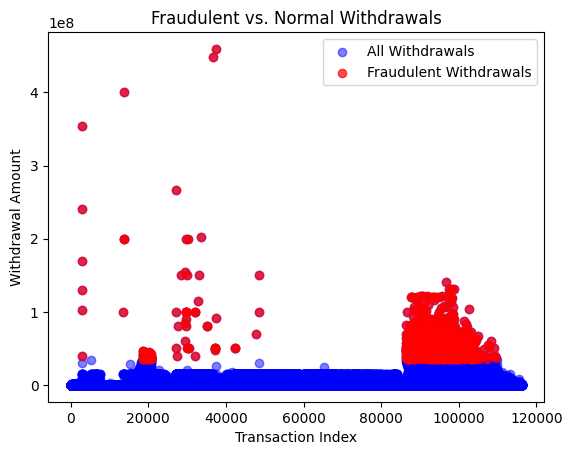

In [45]:
# Scatter plot: All withdrawal transactions
plt.scatter(bankDataframe.index, bankDataframe["WITHDRAWAL AMT"], color="blue", alpha=0.5, label="All Withdrawals")

# Scatter plot: Fraudulent (high amount) withdrawals
plt.scatter(fraud_high_amount_withdrawn.index, fraud_high_amount_withdrawn["WITHDRAWAL AMT"], 
            color="red", alpha=0.7, label="Fraudulent Withdrawals")

# Labels and title
plt.xlabel("Transaction Index")
plt.ylabel("Withdrawal Amount")
plt.title("Fraudulent vs. Normal Withdrawals")
plt.legend()
plt.show()


5.2 Users with Most Rapid Transactions

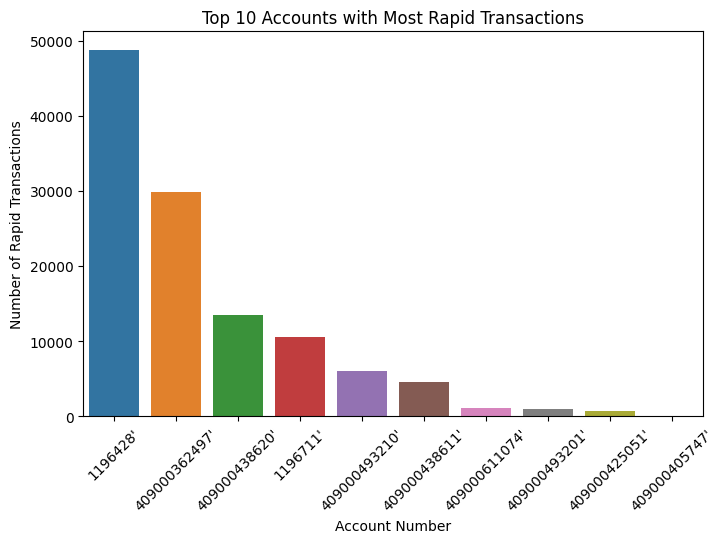

In [49]:
top_rapid_users = fraud_rapid_txn["Account No"].value_counts().head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=top_rapid_users.index, y=top_rapid_users.values, hue=top_rapid_users.index, legend=False)
plt.xlabel("Account Number")
plt.ylabel("Number of Rapid Transactions")
plt.title("Top 10 Accounts with Most Rapid Transactions")
plt.xticks(rotation=45)
plt.show()

5.3 Line plot showing an account's withdrawal amount over time

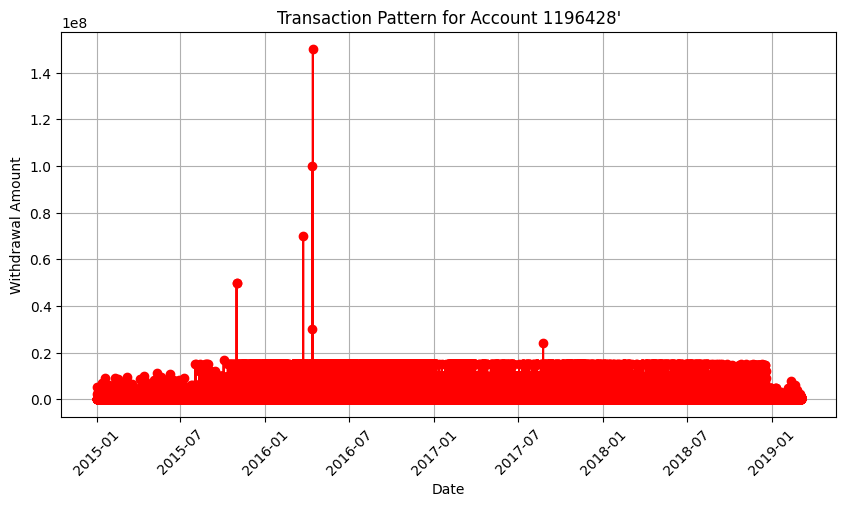

In [53]:
# Select a suspicious user to visualize
example_user = suspicious_users["Account No"].iloc[0]

# Filter data for that user
user_data = bankDataframe[bankDataframe["Account No"] == "1196428'"]

# Plot withdrawal amount over time
plt.figure(figsize=(10, 5))
plt.plot(user_data["DATE"], user_data["WITHDRAWAL AMT"], marker="o", linestyle="-", color="red")
plt.xlabel("Date")
plt.ylabel("Withdrawal Amount")
plt.title(f"Transaction Pattern for Account {example_user}")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Step6: Saving suspicious users in csv

In [54]:
fraud_suspects = pd.concat([fraud_high_amount_withdrawn,fraud_rapid_txn,suspicious_users,suspicious_accounts])
fraud_suspects.to_csv("suspected_fraud_cases.csv",index=False)